In [13]:
import cv2
import os
import numpy as np
import time

In [2]:
#violent_videos_folder=r'C:\myfiles\violence detection pytorch\final_violent_videos'
#all_violent_videos=os.listdir(violent_videos_folder)

In [1]:
import cv2
import os
import numpy as np
videos_folder=r'C:\myfiles\manual dataset\non violent videos'
violent_videos=os.listdir(videos_folder)
count=1
for i in range(len(violent_videos)):
    
    cap=cv2.VideoCapture(os.path.join(videos_folder,violent_videos[i]))
    while (cap.isOpened()):
        success,frame=cap.read()
        if success ==False:
                break
        cv2.imwrite(r'C:\myfiles\final dataset\non violent frames\\'+'non violent '+str(count)+'.jpg',frame)
        count+=1
    
    cap.release()
    cv2.destroyAllWindows()  

In [14]:
import torch
import torch.nn as nn
from torch_snippets import *
from torchvision import transforms
from sklearn.model_selection import train_test_split
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
import os  
import torch
import torch.nn as nn
from torch_snippets import *
from torchvision import transforms
from sklearn.model_selection import train_test_split
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
import os

In [15]:
class violence_dataset(Dataset):
    def __init__(self,folder):
        #if folder =='training':
        #    self.frames=r'C:\myfiles\new_violence_detection\all_training'
        #    self.items=os.listdir(r'C:\myfiles\new_violence_detection\all_training')
    
        if folder=='testing':
            self.frames=r'C:\myfiles\final dataset\all_testing'
            self.items=os.listdir(r'C:\myfiles\final dataset\all_testing')
            
    def __getitem__(self,ix):
        temp=ix
        if self.frames==r'C:\myfiles\final dataset\all_testing':
            total_images_list=[]
            count=0
            local_images=[]
            image1=cv2.imread(os.path.join(self.frames,os.listdir(self.frames)[ix+9*ix]))
            image1=cv2.resize(image1,(100,100))
            image1=torch.Tensor(image1).permute(2,0,1)
            #image1=torch.unsqueeze(image1,0)
            #local_images.append(image)
            image2=cv2.imread(os.path.join(self.frames,os.listdir(self.frames)[ix+1+9*ix]))
            image2=cv2.resize(image2,(100,100))
            image2=torch.Tensor(image2).permute(2,0,1)
            #image2=torch.unsqueeze(image2,0)
            #local_images.append(image)
            image3=cv2.imread(os.path.join(self.frames,os.listdir(self.frames)[ix+2+9*ix]))
            image3=cv2.resize(image3,(100,100))
            image3=torch.Tensor(image3).permute(2,0,1)
            #image3=torch.unsqueeze(image3,0)
            #local_images.append(image)
            image4=cv2.imread(os.path.join(self.frames,os.listdir(self.frames)[ix+3+9*ix]))
            image4=cv2.resize(image4,(100,100))
            image4=torch.Tensor(image4).permute(2,0,1)
            #image4=torch.unsqueeze(image4,0)
            #local_images.append(image)
            image5=cv2.imread(os.path.join(self.frames,os.listdir(self.frames)[ix+4+9*ix]))
            image5=cv2.resize(image5,(100,100))
            image5=torch.Tensor(image5).permute(2,0,1)
            #image5=torch.unsqueeze(image5,0)
            #local_images.append(image)
            image6=cv2.imread(os.path.join(self.frames,os.listdir(self.frames)[ix+5+9*ix]))
            image6=cv2.resize(image6,(100,100))
            image6=torch.Tensor(image6).permute(2,0,1)
            #image6=torch.unsqueeze(image6,0)
            #local_images.append(image)
            image7=cv2.imread(os.path.join(self.frames,os.listdir(self.frames)[ix+6+9*ix]))
            image7=cv2.resize(image7,(100,100))
            image7=torch.Tensor(image7).permute(2,0,1)
            #image7=torch.unsqueeze(image7,0)
            #local_images.append(image)
            image8=cv2.imread(os.path.join(self.frames,os.listdir(self.frames)[ix+7+9*ix]))
            image8=cv2.resize(image8,(100,100))
            image8=torch.Tensor(image8).permute(2,0,1)
            #image8=torch.unsqueeze(image8,0)
            #local_images.append(image)
            image9=cv2.imread(os.path.join(self.frames,os.listdir(self.frames)[ix+8+9*ix]))
            image9=cv2.resize(image9,(100,100))
            image9=torch.Tensor(image9).permute(2,0,1)
            #image9=torch.unsqueeze(image9,0)
            #local_images.append(image)
            image10=cv2.imread(os.path.join(self.frames,os.listdir(self.frames)[ix+9+9*ix]))
            image10=cv2.resize(image10,(100,100))
            image10=torch.Tensor(image10).permute(2,0,1)
            #image10=torch.unsqueeze(image10,0)
            #image=torch.cat((image1,image2,image3,image4,image5,image6,image7,image8,image9,image10),0)
            image_path=os.path.join(self.frames,os.listdir(self.frames)[ix+9*ix])
            if image_path.split('\\')[-1][0]=='n':
                    label=torch.Tensor([0]).long()
            elif  image_path.split('\\')[-1][0]=='v':
                    label=torch.Tensor([1]).long() 
            #total_frame=torch.cat((image1,image2,image3,image4,image5,image6,image7,image8,image9,image10),0 )       
                    
            return image1.to(device),image2.to(device),image3.to(device),image4.to(device),image5.to(device),image6.to(device),image7.to(device),image8.to(device),image9.to(device),image10.to(device),label.to(device)        
            #return total_frame        
    def __len__(self):
        return int(len(self.items)/10)            
            

In [16]:
test_ds=violence_dataset('testing')
test_dl = DataLoader(test_ds, batch_size=1, shuffle=True)


In [17]:
from torchvision.models import vgg16_bn
class violent_net(nn.Module):
    def __init__(self, pretrained=True):
            super().__init__()
            self.encoder = vgg16_bn(pretrained=pretrained).features  
            self.convblock=nn.Sequential(*self.encoder[:])
            self.flatten=nn.Flatten()
            self.lstm=nn.LSTM(input_size=4608, hidden_size=20, num_layers=2,bidirectional=True)
            self.flatten=nn.Flatten()
            self.linear1=nn.Linear(400,32)
            self.activation1=nn.ReLU()
            self.linear2=nn.Linear(32,16)
            self.activation2=nn.ReLU()
            self.linear3=nn.Linear(16,2)
            self.activation3=nn.Softmax(dim=1)
            
    def forward(self, x1,x2,x3,x4,x5,x6,x7,x8,x9,x10):
        x1 = self.convblock(x1)
        x1=self.flatten(x1)
        x2 = self.convblock(x2)
        x2=self.flatten(x2)
        x3 = self.convblock(x3)
        x3=self.flatten(x3)
        x4 = self.convblock(x4)
        x4=self.flatten(x4)
        x5 = self.convblock(x5)
        x5=self.flatten(x5)
        x6 = self.convblock(x6)
        x6=self.flatten(x6)
        x7 = self.convblock(x7)
        x7=self.flatten(x7)
        x8 = self.convblock(x8)
        x8=self.flatten(x8)
        x9 = self.convblock(x9)
        x9=self.flatten(x9)
        x10 = self.convblock(x10)
        x10=self.flatten(x10)
        x=torch.cat((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10),0)
        x=torch.unsqueeze(x,1)
        x=self.lstm(x)
        x=torch.cat((x[0][0],x[0][1],x[0][2],x[0][3],x[0][4],x[0][5],x[0][6],x[0][7],x[0][8],x[0][9]),1)
        x=self.flatten(x)
        x=self.linear1(x)
        x=self.activation1(x)
        x=self.linear2(x)
        x=self.activation2(x)
        x=self.linear3(x)
        #x=self.activation3(x)
        
        
       # return x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
        return x

In [18]:
model = violent_net()
model.load_state_dict(torch.load(r'C:\myfiles\lastgpmodel.pt'))

<All keys matched successfully>

In [19]:
model=model.to(device)

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
y_pred = []
y_true = []

# iterate over test data
for input1,input2,input3,input4,input5,input6,input7,input8,input9,input10, labels in test_dl:
        output = model(input1,input2,input3,input4,input5,input6,input7,input8,input9,input10) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

In [21]:
classes = ('not violent', 'violent')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)

cf_matrix

array([[ 84,  40],
       [ 23, 102]], dtype=int64)

<AxesSubplot:>

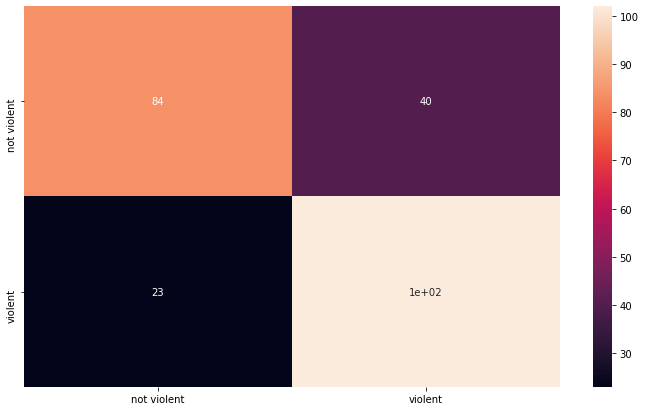

In [22]:
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                    columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

In [12]:
from sklearn.metrics import classification_report
target_names = ['non violent', 'violent']    
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 non violent       0.79      0.68      0.73       124
     violent       0.72      0.82      0.76       125

    accuracy                           0.75       249
   macro avg       0.75      0.75      0.75       249
weighted avg       0.75      0.75      0.75       249

